In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [218]:
file_data = pd.read_csv("~/Downloads/special_indicator_stream1.csv")

In [219]:
#raw data preprocessing step
file_data = file_data.select_dtypes(include=['float64', 'int64'])
file_data = file_data.fillna(0)
file_data = file_data.astype('float64')
# Remove rows with NaN or infinite values
file_data = file_data[np.isfinite(file_data.iloc[:, 4])]

In [220]:
file_data = file_data.iloc[1786:]

In [221]:
# Select two columns by index (e.g., columns 0 and 1)
data = file_data.iloc[:, [0, 7]]

# Rename the columns
data.columns = ['close', 'indicator']

In [222]:
# calculate percent changes to make stationary
data.loc[:, 'close'] = data['close'].pct_change()
#scale to log to minimize outliers
data['close'] = np.log1p(data['close'])

/tmp/ipykernel_9488/1472929464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close'] = np.log1p(data['close'])


In [223]:
X = data.shift(1)
y = data['close']#.clip(-0.0002,0.0002)
X['close'] = X['close']#.clip(-0.0002,0.0002)
# Drop rows where either X or y has NaN
X = X.iloc[1:]  # Remove the first row of X (shifted data creates NaN there)
y = y.iloc[1:]  # Align y by removing the same first row
X = X.fillna(0)

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [232]:
pipe = Pipeline([
    #("poly", PolynomialFeatures(degree=3, include_bias=False)),
	("scale", MinMaxScaler()),
	("model", KNeighborsRegressor(40))
])

In [233]:
# train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('model', KNeighborsRegressor(n_neighbors=40))])

In [234]:
# create prediction
y_pred = pipe.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Closing price change')

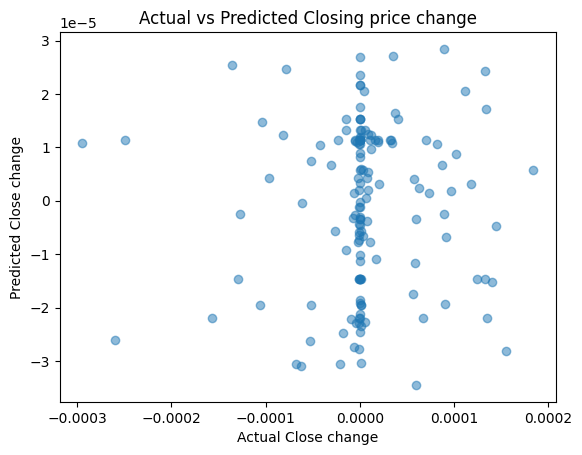

In [235]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Close change")
plt.ylabel("Predicted Close change")
plt.title("Actual vs Predicted Closing price change")

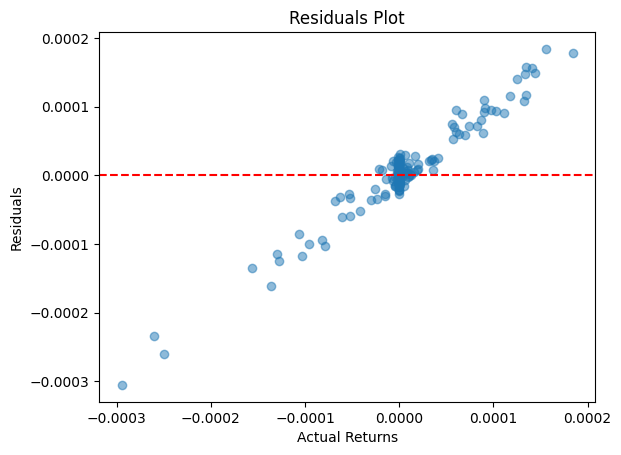

In [236]:
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Returns")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()